<a href="https://colab.research.google.com/github/chayvw18/Deep-Learning-PyTorch/blob/main/LossFun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Deep-Learning

/content/drive/MyDrive/Deep-Learning


**Loss Function**
<br>

*Why we need losses*
<br>
We need losses to train the model.
```
σ(xΤw) - w - yhat 'forward pass'  linerar function input times the weight , a linear weighted combination of the inputs, and then passes through the sigmoid which is a nonliner activation function
```
The difference from what the model thinks is going on in the outside world and what is actually measured from the outside world is the loss function
<br>
Technically we use the derivative of the loss function that we use to update the weights and tell us how the lossfun changes as a function in the weighted parameters
<br>
'gradient' multi demensional derivative, and we then multiply the gradient by a learning rate which we call η.
<br>
The point of the lr is to scale the gradient down so that we are taking "small steps in the right direction"
```
w <-- w - ηdℒ
```


**Cross Entropy Loss**
```
𝓛 = -(ylog(yhat) + (1-y)log(1-yhat))
```
<br>

Binary Cross Entropy(BCE) - used for two possoble answers
<br>

Categorical cross-entropy aka negative likelihood - used with one hot encoding, when we have multiple categories
<br>

When N = 1 and C = 2 (one data sample and two categories), y2 = 1-y1
<br>

With categorical data the y's are 0 or 1 but the yhat are not 0 or 1. They are numerical values between 0 and 1, because these are probabilities that the model outputs.
<br>
*other loss functions*
<br>
Kullback-Leibler divergence(KL Distance) - measures the 'distance' between two probability distributions

```
𝓛 = Σ p(x) log(p(x)/q(x))
```

**Outout layer architectures**
<br>
Predict continous data:
* Output layers has one unit with *linear activation function*
* MSE loss function

Binary Classification:
* Output layer has one unit with *sigmoid activation function*
* Cross entropy loss function BCE

Multiclass(N-way) classification
* Output layer hasN units with *softmax activation functions*
* cross entropy loss function CCE

**Sigmoid vs Softmax**
<br>
*Why softmax for multiclass classification?*
<br>
Softmax for two categories equals sigmoid
<br>
using sigmoid for multiclass categorization doesn’t create a probability distribution
<br>
Sigmoid rewards correct responses; softmax also penalizes incorrect responses
<br>

**Softmax vs log-softmax**
<br>

Log-softmax: compute softmax, then take log(p), log-softmax increases the sensitivity  to discriminate between different decisions, different categories at small probabilities
<br>
Log softmax also gives a stronger penalty for errors compared to regular softmax.



In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


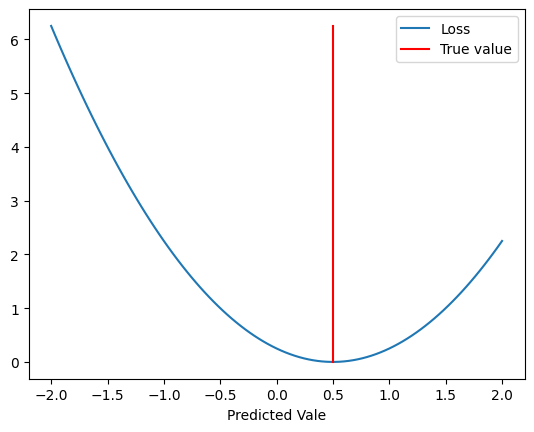

In [5]:
#mean square error

lossFunMSE = nn.MSELoss()

#create predictiond and real answer
yhat = torch.linspace(-2, 2, 101)
y = torch.tensor(.5)

#compute MSE loss function
L = np.zeros(101)
for i, yy in enumerate(yhat):
  L[i] = lossFunMSE(yy, y)

plt.plot(yhat, L, label='Loss')
plt.plot([y,y], [0, np.max(L)], 'r', label='True value')
plt.xlabel('Predicted Vale')
plt.legend()
plt.show()

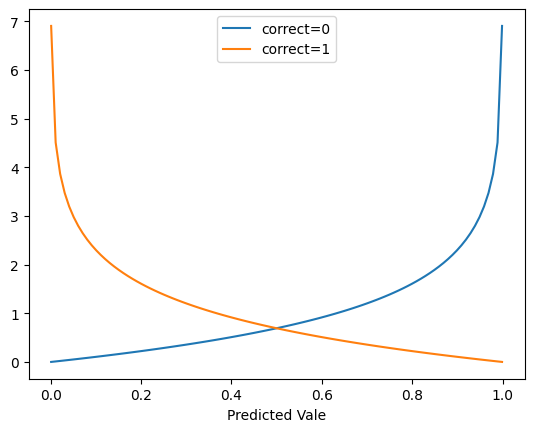

In [7]:
#BCE
lossFunBCE = nn.BCELoss()

#create predictiond and real answer
yhat = torch.linspace(.001, .999, 101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

#compute MSE loss function
L = np.zeros((101, 2))
for i, yy in enumerate(yhat):
  L[i,0] = lossFunBCE(yy, y1)
  L[i,1] = lossFunBCE(yy, y2)

plt.plot(yhat, L, label='Loss')
# plt.plot([y,y], [0, np.max(L)], 'r', label='True value')
plt.xlabel('Predicted Vale')
plt.legend(['correct=0', 'correct=1'])
plt.show()

In [9]:
lossFunCCE = nn.CrossEntropyLoss()

#vector of output layer (presoftmax)
yhat = torch.tensor([[1., 4, 3]])


for i in range(3):
  correctAnswer = torch.tensor([i])
  thisloss = lossFunCCE(yhat, correctAnswer).item()
  print('Loss when correct answer is %g: %g' %(i, thisloss))

Loss when correct answer is 0: 3.34901
Loss when correct answer is 1: 0.349012
Loss when correct answer is 2: 1.34901


In [12]:
sm = nn.Softmax(dim=1)
yhat_sm = sm(yhat)

for i in range(3):
  correctAnswer = torch.tensor([i])
  thisloss = lossFunCCE(yhat_sm, correctAnswer).item()
  print('Loss when correct answer is %g: %g' %(i, thisloss)) #incorrect softmax twice

Loss when correct answer is 0: 1.43658
Loss when correct answer is 1: 0.766318
Loss when correct answer is 2: 1.21221


In [14]:
sm = nn.LogSoftmax(dim=1)
yhat_logsm = sm(yhat)

print(yhat)
print(yhat_sm) #prop distribution
print(yhat_logsm)



tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])


In [16]:
#create your own custom loss function
class myLoss(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x,y):
    loss = torch.abs(x-y)
    return loss

#test it out
lfun = myLoss()
lfun(torch.tensor(4), torch.tensor(5.2))

tensor(1.2000)